<a href="https://colab.research.google.com/github/navgaur/Statistical-Mech-LOCF/blob/main/Particles_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Mechanics Lab**

## **Collection of Particles**

**Lennard-Jones Potential**: It describes the pairwise interaction between the particles:

$$V_{LJ} (r) = 4 \epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $$

where $r$ is the distance between particles, $\epsilon$ is the depth of potential well and $\sigma$ is the finite distance at which inter-particle potential is zero.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(eps,r,sigma):
  return 4*eps*((sigma/r)**12 - (sigma/r)**6)



<ipython-input-10-beb57576f06f>:22: RuntimeWarning: overflow encountered in double_scalars
  2 * (sigma**12 / distance**14) - (sigma**6 / distance**8)


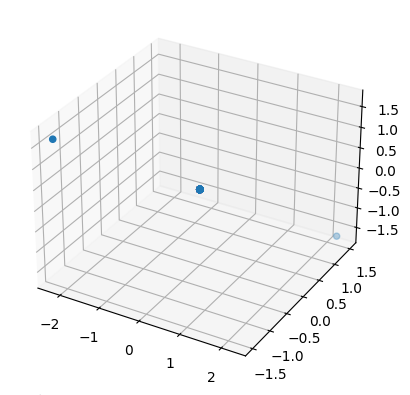

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(r, epsilon, sigma):
    """
    Lennard-Jones potential function.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def calculate_forces(positions, epsilon, sigma):
    """
    Calculate forces between particles using Lennard-Jones potential.
    """
    num_particles = len(positions)
    forces = np.zeros_like(positions)

    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            r_ij = positions[j] - positions[i]
            distance = np.linalg.norm(r_ij)
            force_magnitude = 24 * epsilon * (
                2 * (sigma**12 / distance**14) - (sigma**6 / distance**8)
            )
            force = force_magnitude * r_ij / distance
            forces[i] += force
            forces[j] -= force

    return forces

def run_simulation(num_particles, epsilon, sigma, num_steps, dt):
    """
    Run molecular dynamics simulation.
    """
    positions = np.random.rand(num_particles, 3)  # Initialize random positions
    velocities = np.random.rand(num_particles, 3)  # Initialize random velocities
    masses = np.ones(num_particles)  # Assume equal masses for simplicity

    for step in range(num_steps):
        forces = calculate_forces(positions, epsilon, sigma)

        # Update positions and velocities using Verlet integration
        positions += velocities * dt + 0.5 * forces / masses[:,None] * dt**2
        new_forces = calculate_forces(positions, epsilon, sigma)
        velocities += 0.5 * (forces + new_forces) / masses[:,None] * dt

        # Optional: Record and visualize data
        if step % 10 == 0:
            # Visualization code (e.g., plotting particle positions)
            pass

    return positions, velocities

# Example usage
num_particles = 100
epsilon = 1.0
sigma = 1.0
num_steps = 30
dt = 0.01

final_positions, final_velocities = run_simulation(num_particles, epsilon, sigma, num_steps, dt)

# Optional: Visualize the final state
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2])
plt.show()
